# BUSSINESS PROBLEM:

Detecting fraud for transactions in a payment gateway.

A new disruptive payment gateway start-up, ‘IndAvenue’, has started gaining traction due to its extremely low processing fees for handling online vendors’ digital payments.

This strategy has led to very low costs of acquiring new vendors. Unfortunately, due to the cheap processing fees, the company was not able to able to build and deploy a robust and fast fraud detection system.

Consequently, a lot of the vendors have accumulated significant economic burden due to handling fraudulent transactions on their platforms. This has resulted in a significant number of current clients leaving IndAvenue’s payment gateway platform for more expensive yet reliable payment gateway companies. The company’s data engineers curated a dataset that they believe follows the real world distribution of transactions on their payment gateway. The company provided with the dataset, to create a fast and robust AI based model that can detect and prevent fraudulent transactions on its payment gateway. They have provided you with the dataset that has the is_fraud column, which encodes the information whether a transaction was fraudulent or not. In this hackathon, you will now have to use this curated data to create a machine learning model that will be able to predict the is_fraud column

Target attribute: "is_fraud"


By in large, the records which are fraudulent in nature are considered to be 'is_fraud as 0' in binary terms.

whereas, the records which are not fraudulent in nature are considered to be is_fraud as 1 in binary terms.

# Domain: fraudulent in Banking


In [1]:
import os

from sklearn.metrics import classification_report


def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TRAIN DATA
            =========================================
            ''')
    print(classification_report(y_train, y_train_pred))

    print('''
            =========================================
               CLASSIFICATION REPORT FOR TEST DATA
            =========================================
            ''')
    print(classification_report(y_test, y_test_pred))

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the Bank.csv
data = pd.read_csv("D:\\MITHYAM\Train_data.csv",na_values=["","na","NA"])
data.head()


,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [4]:
data.shape

(76529, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [6]:
# information of the varibles
def read_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Unique Data":data.apply(lambda x: x.nunique(),axis=0),
                       "Levels":data.apply(lambda x: str(x.unique()),axis = 0),"Null_values":data.isnull().sum(),'null%':(data.isnull().sum()/100)})
read_data(data)

,Data Type,No of Unique Data,Levels,Null_values,null%
transaction_number,int64,76529,[144703125000 77406814453032 308929485482801 ....,0,0.0
user_id,int64,3594,[17539344 24710841 24265476 ... 9253764 422500...,0,0.0
payment_method,object,6,['sbi_atm_cum_debit_card' 'e_wallet_payments' ...,0,0.0
partner_id,int64,23,[47334 78890 102557 118335 23667 7889 31556 86...,0,0.0
partner_category,object,9,['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_...,0,0.0
country,object,1,['IND_INR'],0,0.0
device_type,object,4,['android_devices' 'other_pcs' 'windows_pcs' '...,0,0.0
money_transacted,float64,1454,[-5.0 100.0 50.0 ... 40.12 41.0 494.0],0,0.0
transaction_initiation,object,75811,['2016-11-15 19:16:12+00:00' '2017-01-11 09:25...,0,0.0
partner_pricing_category,int64,4,[2 4 1 0],0,0.0


In [7]:
data.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [8]:
data=data.drop(columns=['transaction_number','user_id','partner_id','country'],axis=1)
data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_method            76529 non-null  object 
 1   partner_category          76529 non-null  object 
 2   device_type               76529 non-null  object 
 3   money_transacted          76529 non-null  float64
 4   transaction_initiation    76529 non-null  object 
 5   partner_pricing_category  76529 non-null  int64  
 6   is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.1+ MB


In [10]:
#check for null values
data.apply(lambda x : sum(x.isnull()))

payment_method              0
partner_category            0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [11]:
for col in data.columns:
    if len(data[col].unique()) < 10:
        print(col, data[col].unique())

payment_method ['sbi_atm_cum_debit_card' 'e_wallet_payments' 'other_debit_cards'
 'visa_master_debit_cards' 'visa_master_credit_cards'
 'unified_payments_interface']
partner_category ['cat_1' 'cat_2' 'cat_3' 'cat_4' 'cat_5' 'cat_6' 'cat_7' 'cat_8' 'cat_9']
device_type ['android_devices' 'other_pcs' 'windows_pcs' 'ios_devices']
partner_pricing_category [2 4 1 0]
is_fraud [0 1]


In [12]:
data['transaction_initiation']=pd.to_datetime(data['transaction_initiation'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   payment_method            76529 non-null  object             
 1   partner_category          76529 non-null  object             
 2   device_type               76529 non-null  object             
 3   money_transacted          76529 non-null  float64            
 4   transaction_initiation    76529 non-null  datetime64[ns, UTC]
 5   partner_pricing_category  76529 non-null  int64              
 6   is_fraud                  76529 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 4.1+ MB


In [13]:
data['month']=data['transaction_initiation'].dt.month
data['day']=data['transaction_initiation'].dt.day
data['dayofweek']=data['transaction_initiation'].dt.dayofweek
data['year']=data['transaction_initiation'].dt.year
data['quarter']=data['transaction_initiation'].dt.quarter
data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,11,15,1,2016,4
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,1,11,2,2017,1
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,12,7,2,2016,4
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,1,11,2,2017,1
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,11,16,2,2016,4


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   payment_method            76529 non-null  object             
 1   partner_category          76529 non-null  object             
 2   device_type               76529 non-null  object             
 3   money_transacted          76529 non-null  float64            
 4   transaction_initiation    76529 non-null  datetime64[ns, UTC]
 5   partner_pricing_category  76529 non-null  int64              
 6   is_fraud                  76529 non-null  int64              
 7   month                     76529 non-null  int64              
 8   day                       76529 non-null  int64              
 9   dayofweek                 76529 non-null  int64              
 10  year                      76529 non-null  int64              
 11  quarter        

In [15]:
def get_time(row):
    return row['transaction_initiation'][11:16]
data['transaction_initiation'] = data['transaction_initiation'].astype(str)
data['transactionTime'] = data.apply(get_time, axis=1)
data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionTime
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,11,15,1,2016,4,19:16
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,1,11,2,2017,1,09:25
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,12,7,2,2016,4,07:58
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,1,11,2,2017,1,16:15
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,11,16,2,2016,4,17:04


In [16]:
def get_hr(row):
    return row['transactionTime'][:2]
data['transactionTime'] = data['transactionTime'].astype(str)
data['transactionHr'] = data.apply(get_hr, axis=1)
data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionTime,transactionHr
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,11,15,1,2016,4,19:16,19
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,1,11,2,2017,1,09:25,09
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,12,7,2,2016,4,07:58,07
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,1,11,2,2017,1,16:15,16
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,11,16,2,2016,4,17:04,17


In [17]:
def get_min(row):
    return row['transactionTime'][3:5]
data['transactionTime'] = data['transactionTime'].astype(str)
data['transactionMin'] = data.apply(get_min, axis=1)
data.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionTime,transactionHr,transactionMin
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0,11,15,1,2016,4,19:16,19,16
1,e_wallet_payments,cat_2,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0,1,11,2,2017,1,09:25,09,25
2,e_wallet_payments,cat_2,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0,12,7,2,2016,4,07:58,07,58
3,other_debit_cards,cat_3,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0,1,11,2,2017,1,16:15,16,15
4,other_debit_cards,cat_1,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0,11,16,2,2016,4,17:04,17,04


In [18]:
data.drop('transaction_initiation',axis=1,inplace=True)

In [19]:
data.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionTime,transactionHr,transactionMin
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2,0,11,15,1,2016,4,19:16,19,16
1,e_wallet_payments,cat_2,other_pcs,100.0,2,0,1,11,2,2017,1,09:25,09,25
2,e_wallet_payments,cat_2,other_pcs,50.0,2,0,12,7,2,2016,4,07:58,07,58
3,other_debit_cards,cat_3,other_pcs,1000.0,2,0,1,11,2,2017,1,16:15,16,15
4,other_debit_cards,cat_1,other_pcs,200.0,2,0,11,16,2,2016,4,17:04,17,04


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_method            76529 non-null  object 
 1   partner_category          76529 non-null  object 
 2   device_type               76529 non-null  object 
 3   money_transacted          76529 non-null  float64
 4   partner_pricing_category  76529 non-null  int64  
 5   is_fraud                  76529 non-null  int64  
 6   month                     76529 non-null  int64  
 7   day                       76529 non-null  int64  
 8   dayofweek                 76529 non-null  int64  
 9   year                      76529 non-null  int64  
 10  quarter                   76529 non-null  int64  
 11  transactionTime           76529 non-null  object 
 12  transactionHr             76529 non-null  object 
 13  transactionMin            76529 non-null  object 
dtypes: flo

In [21]:
data[["transactionHr", "transactionMin"]] = data[["transactionHr", "transactionMin"]].apply(pd.to_numeric)

In [22]:
data.drop('transactionTime',axis=1,inplace=True)

In [23]:
data.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionHr,transactionMin
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2,0,11,15,1,2016,4,19,16
1,e_wallet_payments,cat_2,other_pcs,100.0,2,0,1,11,2,2017,1,9,25
2,e_wallet_payments,cat_2,other_pcs,50.0,2,0,12,7,2,2016,4,7,58
3,other_debit_cards,cat_3,other_pcs,1000.0,2,0,1,11,2,2017,1,16,15
4,other_debit_cards,cat_1,other_pcs,200.0,2,0,11,16,2,2016,4,17,4


In [24]:
cat_col=['payment_method','partner_category','device_type','is_fraud']
num_col=data.columns.difference(cat_col)
cat_col

['payment_method', 'partner_category', 'device_type', 'is_fraud']

### Visualization

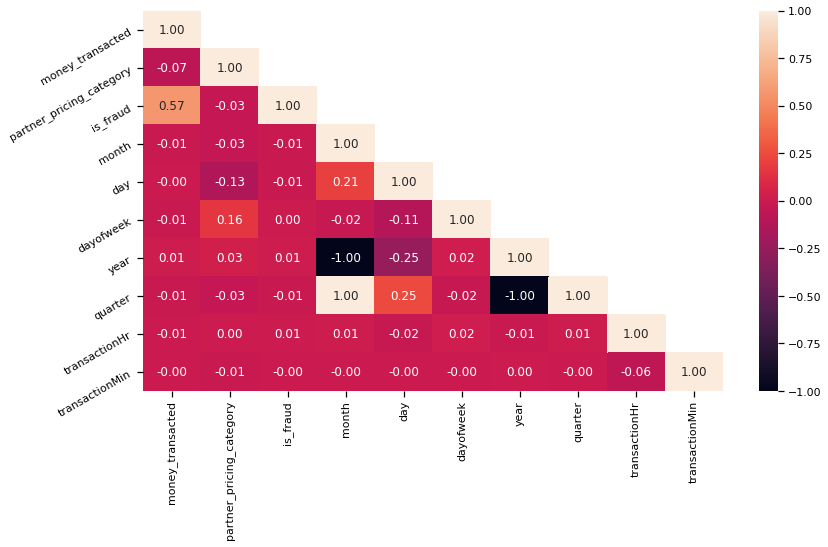

In [25]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

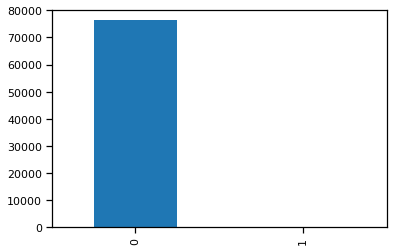

In [26]:
data['is_fraud'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

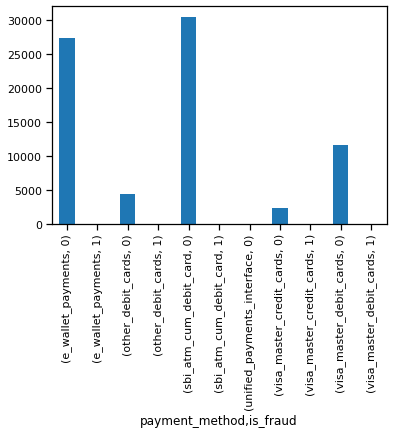

In [27]:
data.groupby(['payment_method','is_fraud']).size().plot(kind='bar')
plt.xticks(rotation=90) 

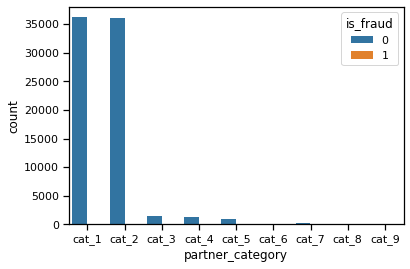

In [28]:
sns.countplot(x='partner_category',data=data,hue='is_fraud')

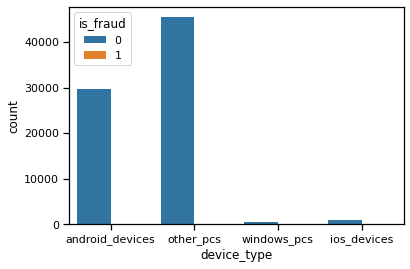

In [29]:
sns.countplot(x="device_type", data=data,hue="is_fraud")

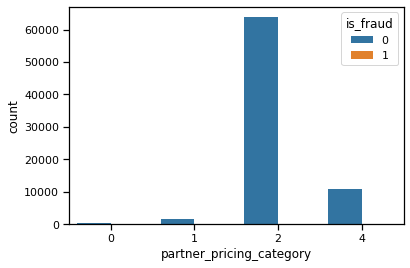

In [30]:

sns.countplot(x="partner_pricing_category", data=data,hue="is_fraud")

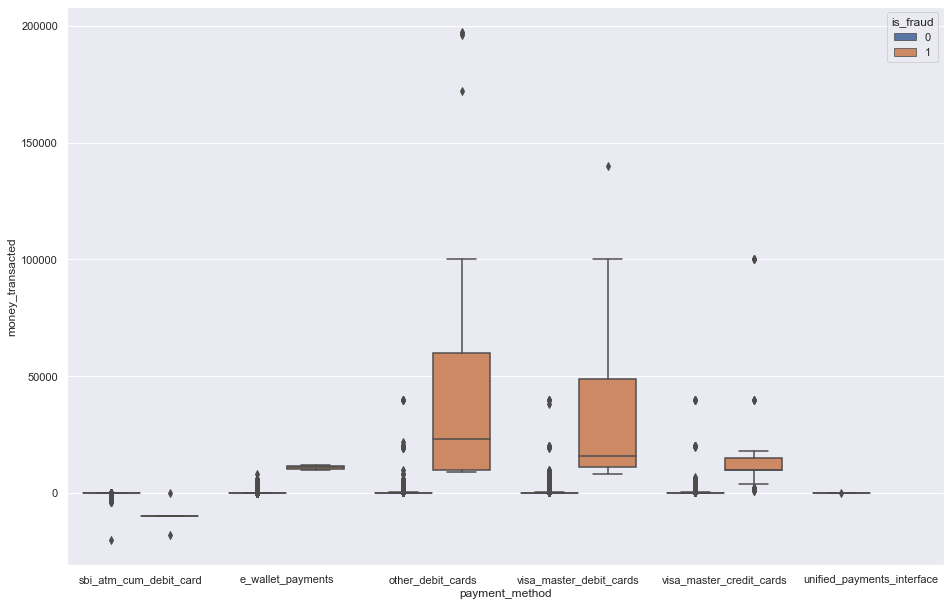

In [31]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x='payment_method',y='money_transacted',data=data,hue='is_fraud')

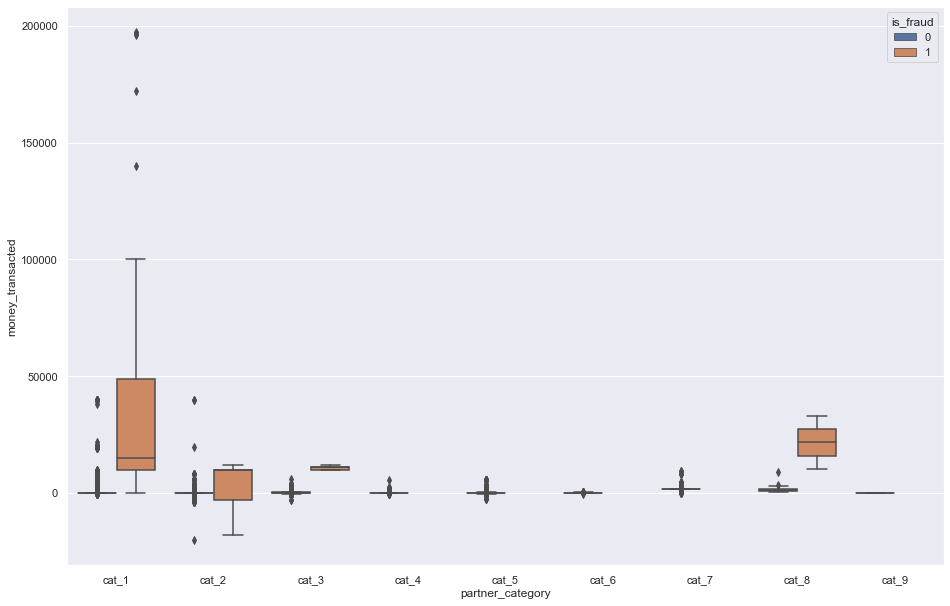

In [32]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x='partner_category',y='money_transacted',data=data,hue='is_fraud')

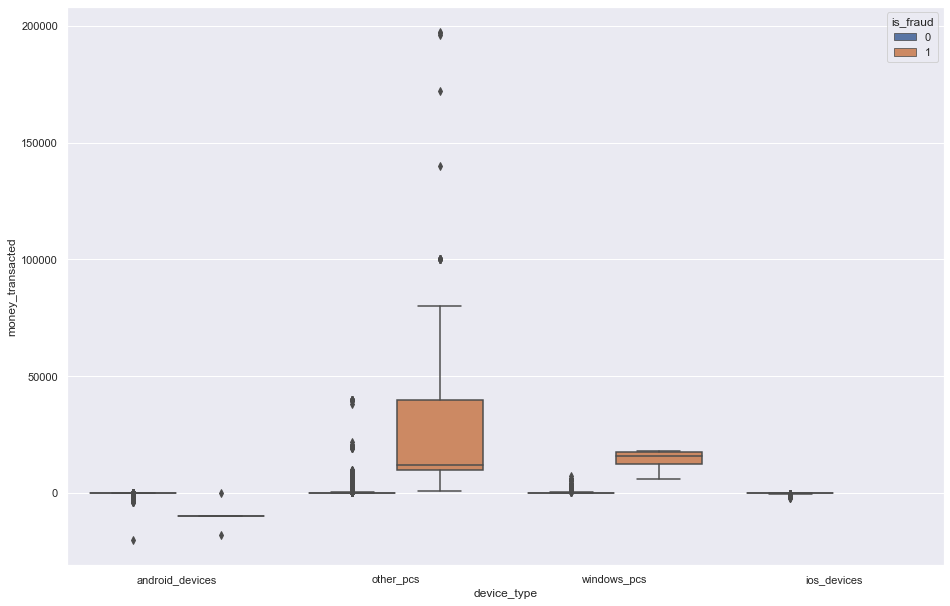

In [33]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x='device_type',y='money_transacted',data=data,hue='is_fraud')

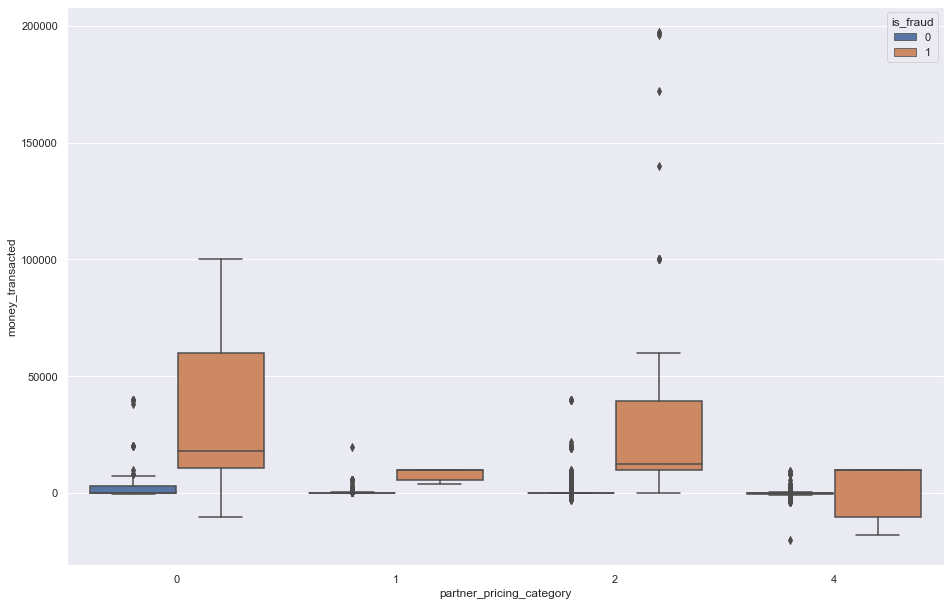

In [34]:
sns.set(rc={'figure.figsize':(15.7,10.27)})
sns.boxplot(x='partner_pricing_category',y='money_transacted',data=data,hue='is_fraud')

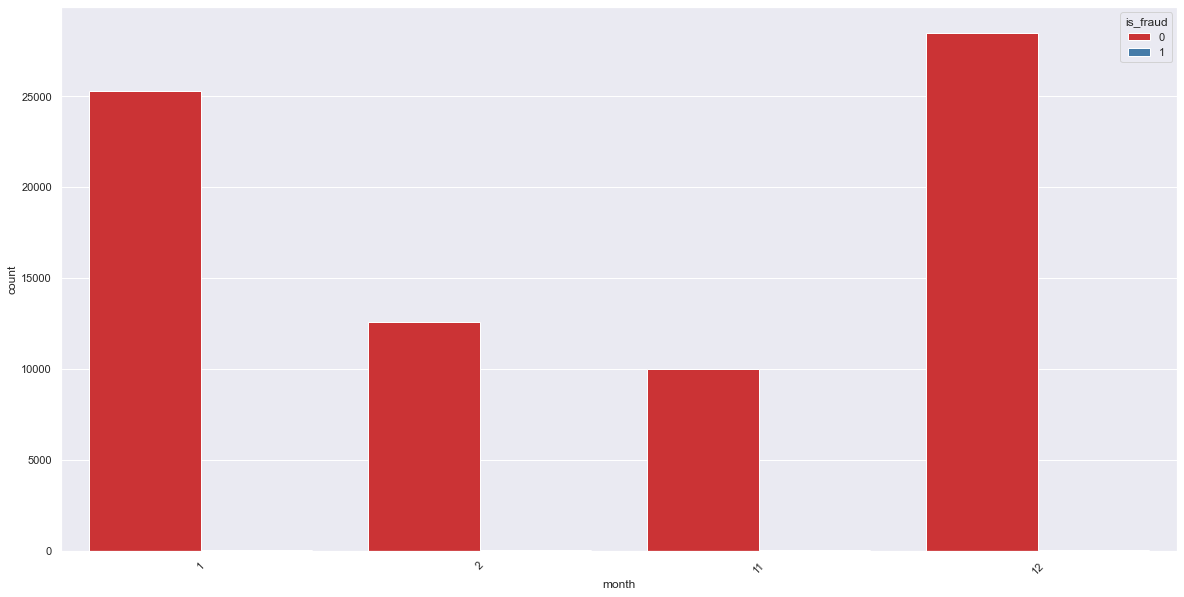

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='month',
    hue='is_fraud',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

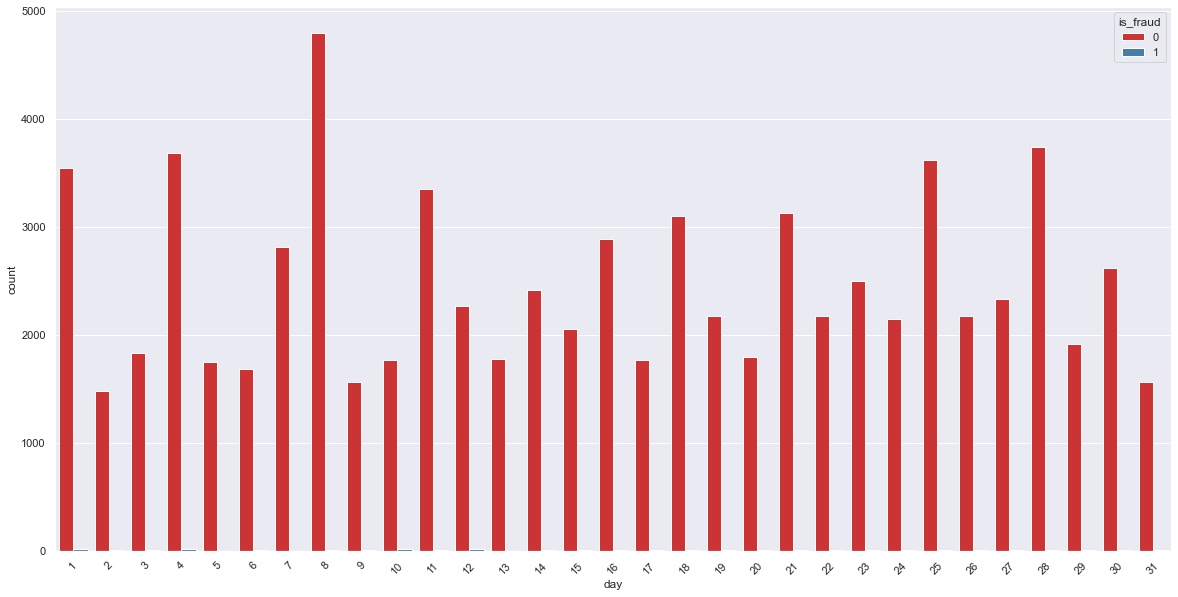

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='day',
    hue='is_fraud',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

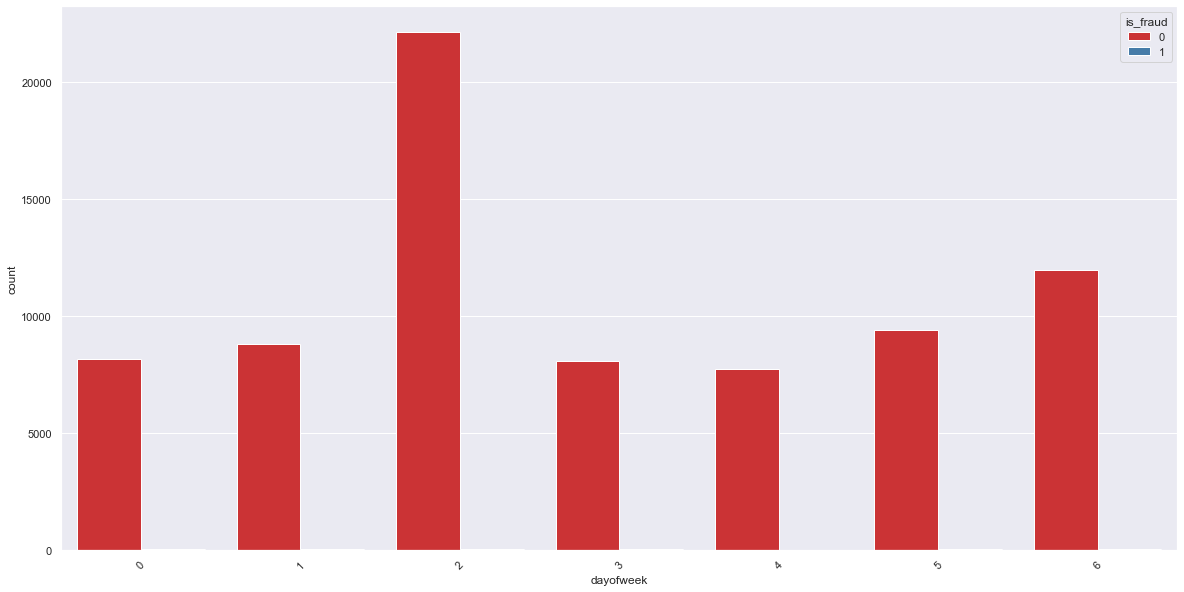

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='dayofweek',
    hue='is_fraud',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

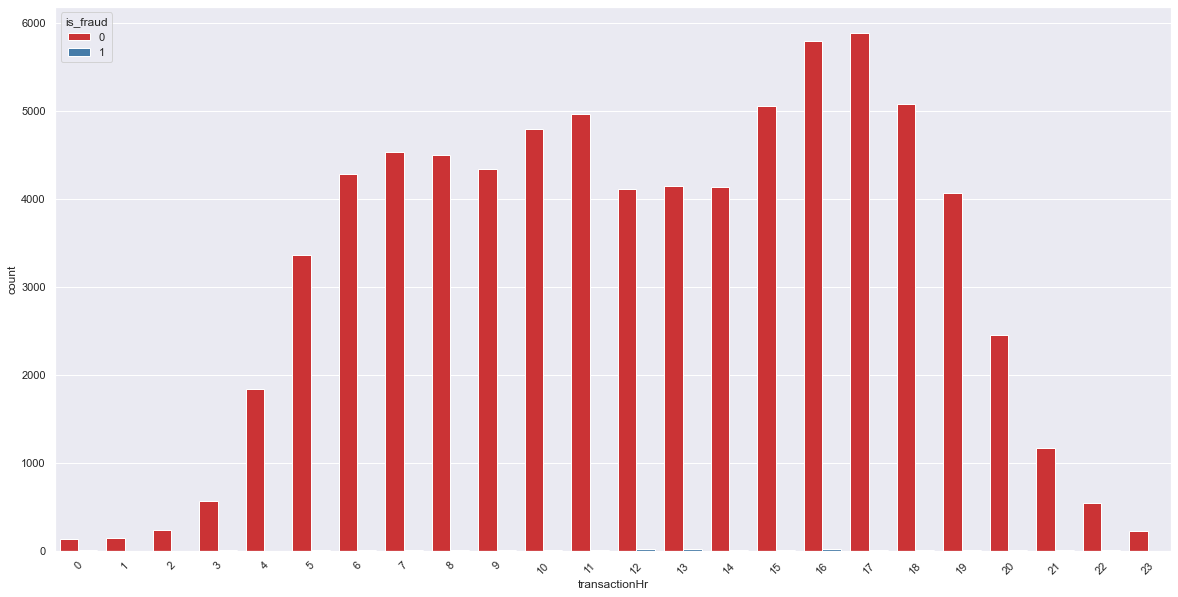

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='transactionHr',
    hue='is_fraud',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

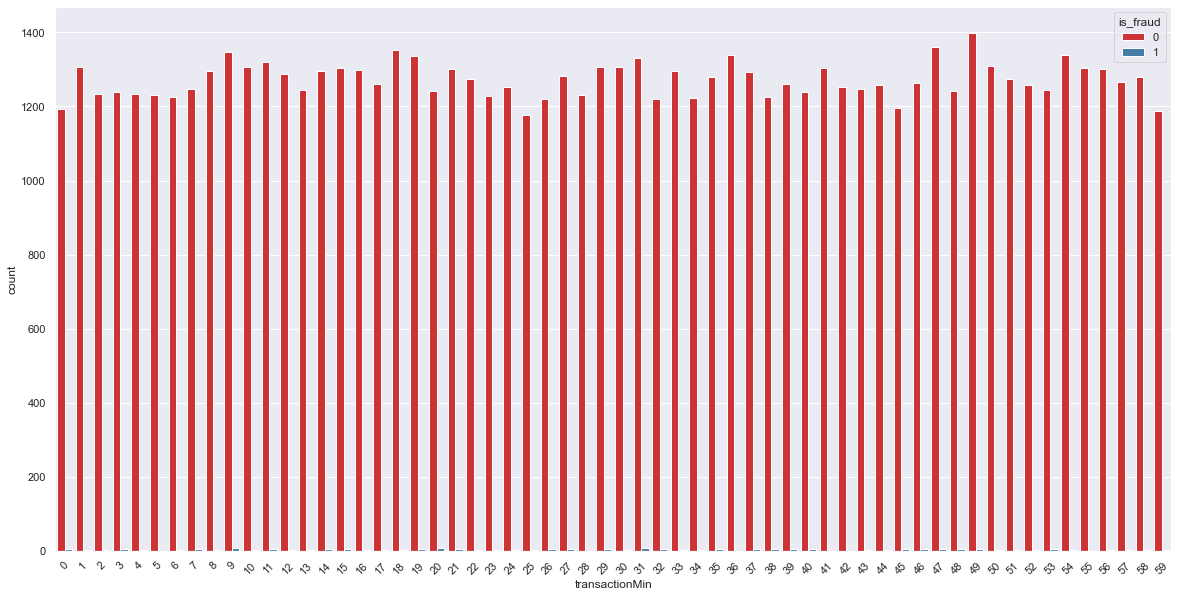

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
chart = sns.countplot(
    data=data,
    x='transactionMin',
    hue='is_fraud',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [40]:
# Import label encoder 
#col = ['payment_method', 'partner_category', 'device_type']
df = data.copy()
from sklearn import preprocessing 
label_encoder_payment_method = preprocessing.LabelEncoder() 
label_encoder_partner_category = preprocessing.LabelEncoder() 
label_encoder_device_type = preprocessing.LabelEncoder() 

label_encoder_payment_method.fit(df['payment_method'])
label_encoder_partner_category.fit(df['partner_category'])
label_encoder_device_type.fit(df['device_type'])

df['payment_method']= label_encoder_payment_method.transform(df['payment_method']) 
df['partner_category']= label_encoder_partner_category.transform(df['partner_category']) 
df['device_type']= label_encoder_device_type.transform(df['device_type']) 
df.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionHr,transactionMin
0,2,0,0,-5.0,2,0,11,15,1,2016,4,19,16
1,0,1,2,100.0,2,0,1,11,2,2017,1,9,25
2,0,1,2,50.0,2,0,12,7,2,2016,4,7,58
3,1,2,2,1000.0,2,0,1,11,2,2017,1,16,15
4,1,0,2,200.0,2,0,11,16,2,2016,4,17,4


In [41]:
df.is_fraud.value_counts()

0    76375
1      154
Name: is_fraud, dtype: int64

In [42]:
# Train test split
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X = df.copy().drop("is_fraud",axis=1)
y = df["is_fraud"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61223, 12)
(15306, 12)
(61223,)
(15306,)


In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train[num_col])

X_train[num_col] = scaler.transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])
X_train.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,month,day,dayofweek,year,quarter,transactionHr,transactionMin
39838,2,1,0,0.089772,1.0,1.000000,0.100000,1.000000,0.0,1.0,0.652174,0.542373
30815,0,3,2,0.092120,0.5,0.000000,0.100000,0.333333,1.0,0.0,0.869565,0.983051
15991,2,1,0,0.089311,1.0,1.000000,0.100000,1.000000,0.0,1.0,0.695652,0.084746
64833,0,1,2,0.092258,0.5,0.909091,0.966667,0.333333,0.0,1.0,0.478261,0.033898
72064,1,0,2,0.092350,0.5,0.909091,0.833333,0.833333,0.0,1.0,0.391304,0.254237


### Basic Models

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

lrc = LogisticRegression()
lrc.fit(X_train,y_train)
y_train_pred_lrc_be = lrc.predict(X_train)
y_test_pred_lrc_be = lrc.predict(X_test)

svc = SVC()
svc.fit(X_train,y_train)
y_train_pred_svc_be = svc.predict(X_train)
y_test_pred_svc_be = svc.predict(X_test)

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_train_pred_dt_be = dtc.predict(X_train)
y_test_pred_dt_be = dtc.predict(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_train_pred_knn_be = dtc.predict(X_train)
y_test_pred_knn_be = dtc.predict(X_test)

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_train_pred_nv_be = naive_model.predict(X_train)
y_test_pred_nv_be =naive_model.predict(X_test)

from sklearn.metrics import f1_score

print("f1_score of DecisionTrees:",f1_score(y_test, y_test_pred_dt_be))
print("f1_score of LogisticRegression:",f1_score(y_test, y_test_pred_lrc_be))
print("f1_score of SupportVectorMachines:",f1_score(y_test, y_test_pred_svc_be))
print("f1_score of KNearestNeighbours:",f1_score(y_test, y_test_pred_knn_be))
print("f1_score of naiibeys:",f1_score(y_test, y_test_pred_nv_be))

f1_score of DecisionTrees: 0.7727272727272727
f1_score of LogisticRegression: 0.08695652173913045
f1_score of SupportVectorMachines: 0.0
f1_score of KNearestNeighbours: 0.7727272727272727
f1_score of naiibeys: 0.375


In [45]:
from collections import Counter
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 495.942


In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
xgb_weight = XGBClassifier()
param_grid = {  'scale_pos_weight':[495.942],
                'max_depth':[8,14,18],
                'n_estimators':[100,150,200],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8]
                
                 
}
# Create grid search object
CV_xgb = GridSearchCV(estimator=xgb_weight, param_grid=param_grid, cv= 5,verbose=1)
CV_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  8.9min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [48]:
CV_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=495.942,
              subsample=0.8, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [49]:
xgb_weight_predict_train=CV_xgb.best_estimator_.predict(X_train)
xgb_weight_predict_test=CV_xgb.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, xgb_weight_predict_train, y_test, xgb_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61098
           1       1.00      1.00      1.00       125

    accuracy                           1.00     61223
   macro avg       1.00      1.00      1.00     61223
weighted avg       1.00      1.00      1.00     61223


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15277
           1       0.74      1.00      0.85        29

    accuracy                           1.00     15306
   macro avg       0.87      1.00      0.93     15306
weighted avg       1.00      1.00      1.00     15306



roc_auc_score for xgb:  0.9998431268099668


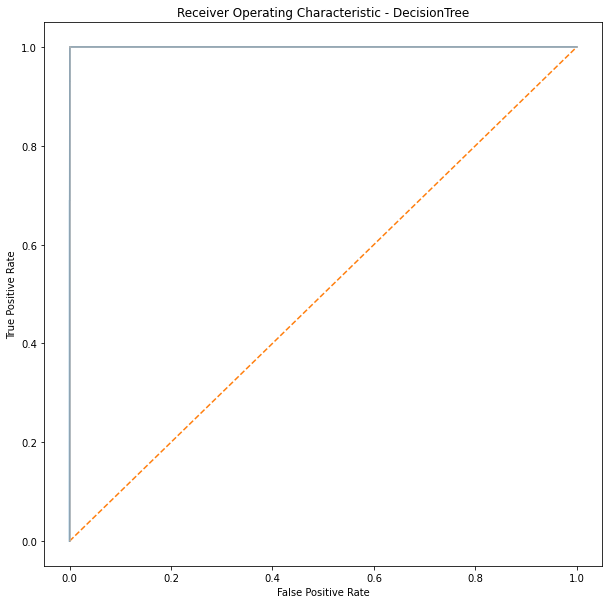

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
y_score1 = CV_xgb.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
print('roc_auc_score for xgb: ', roc_auc_score(y_test, y_score1))
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
parms = {  'scale_pos_weight':[495.942],
                'max_depth':[6,8,10,14,15,18],
                'n_estimators':[100,150,200,250],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8,0.7]
                
                 
}
clf = lgb.LGBMClassifier()

CV_lgbm = GridSearchCV(estimator = clf,param_grid = parms,cv=3,refit=True,
                        return_train_score = True,verbose=10,n_jobs=-1)
CV_lgbm.fit(X_train,y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [6, 8, 10, 14, 15, 18],
                         'n_estimators': [100, 150, 200, 250],
                         'scale_pos_weight': [495.942],
                         'subsample': [0.8, 0.7]},
             return_train_score=True, verbose=10)

In [86]:
CV_lgbm.best_estimator_

LGBMClassifier(learning_rate=0.01, max_depth=14, n_estimators=250,
               scale_pos_weight=495.942, subsample=0.8)

In [87]:
CV_lgbm.best_params_

{'learning_rate': 0.01,
 'max_depth': 14,
 'n_estimators': 250,
 'scale_pos_weight': 495.942,
 'subsample': 0.8}

In [88]:
lgbm_weight_predict_train=CV_lgbm.best_estimator_.predict(X_train)
lgbm_weight_predict_test=CV_lgbm.best_estimator_.predict(X_test)
classifcation_report_train_test(y_train, lgbm_weight_predict_train, y_test, lgbm_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61098
           1       0.72      1.00      0.84       125

    accuracy                           1.00     61223
   macro avg       0.86      1.00      0.92     61223
weighted avg       1.00      1.00      1.00     61223


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15277
           1       0.61      0.97      0.75        29

    accuracy                           1.00     15306
   macro avg       0.80      0.98      0.87     15306
weighted avg       1.00      1.00      1.00     15306



### Upsampling Concept

In [97]:
from sklearn.utils import resample
# Separate majority and minority classes
df1 = df.copy()
df_majority = df1[df.is_fraud==0]
df_minority = df1[df.is_fraud==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=76375,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.is_fraud.value_counts()

1    76375
0    76375
Name: is_fraud, dtype: int64

In [98]:
df_upsampled.shape

(152750, 13)

In [99]:
# Train test split
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X = df_upsampled.copy().drop("is_fraud",axis=1)
y = df_upsampled["is_fraud"]

## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X, y, test_size=0.20,shuffle=True)

## Print the shape of X_train, X_test, y_train, y_test
print(X_train_upsampled.shape)
print(X_test_upsampled.shape)
print(y_train_upsampled.shape)
print(y_test_upsampled.shape)

(122200, 12)
(30550, 12)
(122200,)
(30550,)


In [100]:
df_upsampled.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,month,day,dayofweek,year,quarter,transactionHr,transactionMin
0,2,0,0,-5.0,2,0,11,15,1,2016,4,19,16
1,0,1,2,100.0,2,0,1,11,2,2017,1,9,25
2,0,1,2,50.0,2,0,12,7,2,2016,4,7,58
3,1,2,2,1000.0,2,0,1,11,2,2017,1,16,15
4,1,0,2,200.0,2,0,11,16,2,2016,4,17,4


In [102]:
X_train_upsampled[num_col] = scaler.transform(X_train_upsampled[num_col])
X_test_upsampled[num_col] = scaler.transform(X_test_upsampled[num_col])
X_train_upsampled.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,month,day,dayofweek,year,quarter,transactionHr,transactionMin
10830,0,1,2,0.092166,0.5,0.090909,0.100000,0.833333,1.0,0.0,0.695652,0.406780
48725,0,1,2,0.092304,0.5,0.909091,0.500000,0.333333,0.0,1.0,0.826087,0.627119
36186,0,1,2,0.138110,0.5,0.090909,0.366667,1.000000,1.0,0.0,0.782609,0.118644
48906,0,4,2,0.094652,0.5,0.090909,0.266667,0.500000,1.0,0.0,0.608696,0.169492
3874,5,0,2,0.092534,0.5,1.000000,0.900000,0.333333,0.0,1.0,0.695652,0.593220


In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
xgb_weight = XGBClassifier()
param_grid = {'max_depth':[8,14,18],
                'n_estimators':[100,150,200],
              'learning_rate':[0.01,0.1,1,10],
              'subsample':[0.8]
                
                 
}
# Create grid search object
CV_xgb = GridSearchCV(estimator=xgb_weight, param_grid=param_grid, cv= 5,verbose=2)
CV_xgb.fit(X_train_upsampled, y_train_upsampled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8, total=   2.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8, total=   2.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8, total=   2.3s
[CV] learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8, total=   2.4s
[CV] learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=8, n_estimators=100, subsample=0.8, total=   2.5s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, subsample=0.8, total=   3.6s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, subsample=0.8, total=   4.1s
[CV] learning_rate=0.01, max_depth=8, n_estimators=150, subsample=0.8 
[CV]  learning_rate=0.01, max_depth=8, n_estimators=150, s

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 12.4min finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [104]:
CV_xgb.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
CV_xgb.best_params_

{'learning_rate': 1, 'max_depth': 14, 'n_estimators': 150, 'subsample': 0.8}

In [106]:
xgb_weight_predict_train=CV_xgb.best_estimator_.predict(X_train_upsampled)
xgb_weight_predict_test=CV_xgb.best_estimator_.predict(X_test_upsampled)
classifcation_report_train_test(y_train_upsampled, xgb_weight_predict_train, y_test_upsampled, xgb_weight_predict_test)


               CLASSIFICATION REPORT FOR TRAIN DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     61067
           1       1.00      1.00      1.00     61133

    accuracy                           1.00    122200
   macro avg       1.00      1.00      1.00    122200
weighted avg       1.00      1.00      1.00    122200


               CLASSIFICATION REPORT FOR TEST DATA
            
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15308
           1       1.00      1.00      1.00     15242

    accuracy                           1.00     30550
   macro avg       1.00      1.00      1.00     30550
weighted avg       1.00      1.00      1.00     30550



## Test_preprocessing

In [128]:
test = pd.read_csv("test_data.csv")
test.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [129]:
# information of the varibles
def read_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Unique Data":data.apply(lambda x: x.nunique(),axis=0),
                       "Levels":data.apply(lambda x: str(x.unique()),axis = 0),"Null_values":data.isnull().sum(),'null%':(data.isnull().sum()/100)})
read_data(test)

,Data Type,No of Unique Data,Levels,Null_values,null%
transaction_number,int64,19133,[857050141038272 4400462872603 120791559856949...,0,0.0
user_id,int64,2617,[3802500 200704 25150225 ... 6315169 5438224 1...,0,0.0
payment_method,object,6,['visa_master_debit_cards' 'e_wallet_payments'...,0,0.0
partner_id,int64,20,[118335 23667 47334 78890 157780 31556 86779 7...,0,0.0
partner_category,object,8,['cat_1' 'cat_2' 'cat_7' 'cat_4' 'cat_3' 'cat_...,0,0.0
country,object,1,['IND_INR'],0,0.0
device_type,object,4,['other_pcs' 'android_devices' 'windows_pcs' '...,0,0.0
money_transacted,float64,695,[200.0 20.0 -100.0 100.0 -0.2 1600.0 -2.1 1000...,0,0.0
transaction_initiation,object,19090,['2016-12-28 14:44:37+00:00' '2016-12-14 17:49...,0,0.0
partner_pricing_category,int64,4,[2 1 4 0],0,0.0


In [130]:
transction_number = test['transaction_number']

In [131]:
test=test.drop(columns=['transaction_number','user_id','partner_id','country'],axis=1)
test.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,e_wallet_payments,cat_2,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,visa_master_credit_cards,cat_2,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,e_wallet_payments,cat_2,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [132]:
test['transaction_initiation']=pd.to_datetime(test['transaction_initiation'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19133 entries, 0 to 19132
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   payment_method            19133 non-null  object             
 1   partner_category          19133 non-null  object             
 2   device_type               19133 non-null  object             
 3   money_transacted          19133 non-null  float64            
 4   transaction_initiation    19133 non-null  datetime64[ns, UTC]
 5   partner_pricing_category  19133 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(3)
memory usage: 897.0+ KB


In [133]:
test['month']=test['transaction_initiation'].dt.month
test['day']=test['transaction_initiation'].dt.day
test['dayofweek']=test['transaction_initiation'].dt.dayofweek
test['year']=test['transaction_initiation'].dt.year
test['quarter']=test['transaction_initiation'].dt.quarter
test.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,month,day,dayofweek,year,quarter
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2016-12-28 14:44:37+00:00,2,12,28,2,2016,4
1,e_wallet_payments,cat_2,other_pcs,20.0,2016-12-14 17:49:48+00:00,2,12,14,2,2016,4
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2017-01-21 10:18:11+00:00,2,1,21,5,2017,1
3,visa_master_credit_cards,cat_2,other_pcs,200.0,2017-01-16 13:25:10+00:00,1,1,16,0,2017,1
4,e_wallet_payments,cat_2,other_pcs,100.0,2017-02-09 12:47:28+00:00,2,2,9,3,2017,1


In [134]:
def get_time(row):
    return row['transaction_initiation'][11:16]
test['transaction_initiation'] = test['transaction_initiation'].astype(str)
test['transactionTime'] = test.apply(get_time, axis=1)
test.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,month,day,dayofweek,year,quarter,transactionTime
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2016-12-28 14:44:37+00:00,2,12,28,2,2016,4,14:44
1,e_wallet_payments,cat_2,other_pcs,20.0,2016-12-14 17:49:48+00:00,2,12,14,2,2016,4,17:49
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2017-01-21 10:18:11+00:00,2,1,21,5,2017,1,10:18
3,visa_master_credit_cards,cat_2,other_pcs,200.0,2017-01-16 13:25:10+00:00,1,1,16,0,2017,1,13:25
4,e_wallet_payments,cat_2,other_pcs,100.0,2017-02-09 12:47:28+00:00,2,2,9,3,2017,1,12:47


In [135]:
def get_min(row):
    return row['transactionTime'][3:5]
test['transactionTime'] = test['transactionTime'].astype(str)
test['transactionMin'] = test.apply(get_min, axis=1)
test.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,month,day,dayofweek,year,quarter,transactionTime,transactionMin
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2016-12-28 14:44:37+00:00,2,12,28,2,2016,4,14:44,44
1,e_wallet_payments,cat_2,other_pcs,20.0,2016-12-14 17:49:48+00:00,2,12,14,2,2016,4,17:49,49
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2017-01-21 10:18:11+00:00,2,1,21,5,2017,1,10:18,18
3,visa_master_credit_cards,cat_2,other_pcs,200.0,2017-01-16 13:25:10+00:00,1,1,16,0,2017,1,13:25,25
4,e_wallet_payments,cat_2,other_pcs,100.0,2017-02-09 12:47:28+00:00,2,2,9,3,2017,1,12:47,47


In [136]:
def get_hr(row):
    return row['transactionTime'][:2]
test['transactionTime'] = test['transactionTime'].astype(str)
test['transactionHr'] = test.apply(get_hr, axis=1)
test.head()

,payment_method,partner_category,device_type,money_transacted,transaction_initiation,partner_pricing_category,month,day,dayofweek,year,quarter,transactionTime,transactionMin,transactionHr
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2016-12-28 14:44:37+00:00,2,12,28,2,2016,4,14:44,44,14
1,e_wallet_payments,cat_2,other_pcs,20.0,2016-12-14 17:49:48+00:00,2,12,14,2,2016,4,17:49,49,17
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2017-01-21 10:18:11+00:00,2,1,21,5,2017,1,10:18,18,10
3,visa_master_credit_cards,cat_2,other_pcs,200.0,2017-01-16 13:25:10+00:00,1,1,16,0,2017,1,13:25,25,13
4,e_wallet_payments,cat_2,other_pcs,100.0,2017-02-09 12:47:28+00:00,2,2,9,3,2017,1,12:47,47,12


In [137]:
test.drop('transaction_initiation',axis=1,inplace=True)

In [138]:
test[["transactionHr", "transactionMin"]] = test[["transactionHr", "transactionMin"]].apply(pd.to_numeric)

In [139]:
test.drop('transactionTime',axis=1,inplace=True)

In [140]:
cat_col=['payment_method','partner_category','device_type']
num_col=test.columns.difference(cat_col)
cat_col

['payment_method', 'partner_category', 'device_type']

In [141]:
test['payment_method']= label_encoder_payment_method.transform(test['payment_method']) 
test['partner_category']= label_encoder_partner_category.transform(test['partner_category']) 
test['device_type']= label_encoder_device_type.transform(test['device_type'])

In [142]:
test.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,month,day,dayofweek,year,quarter,transactionMin,transactionHr
0,5,0,2,200.0,2,12,28,2,2016,4,44,14
1,0,1,2,20.0,2,12,14,2,2016,4,49,17
2,2,0,0,-100.0,2,1,21,5,2017,1,18,10
3,4,1,2,200.0,1,1,16,0,2017,1,25,13
4,0,1,2,100.0,2,2,9,3,2017,1,47,12


In [143]:
from sklearn.preprocessing import MinMaxScaler
test[num_col] = scaler.transform(test[num_col])
test.head()

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,month,day,dayofweek,year,quarter,transactionMin,transactionHr
0,5,0,2,0.092994,0.50,1.000000,0.900000,0.333333,0.0,1.0,0.745763,0.608696
1,0,1,2,0.092166,0.50,1.000000,0.433333,0.333333,0.0,1.0,0.830508,0.739130
2,2,0,0,0.091613,0.50,0.000000,0.666667,0.833333,1.0,0.0,0.305085,0.434783
3,4,1,2,0.092994,0.25,0.000000,0.500000,0.000000,1.0,0.0,0.423729,0.565217
4,0,1,2,0.092534,0.50,0.090909,0.266667,0.500000,1.0,0.0,0.796610,0.521739


In [144]:
test = test[['payment_method','partner_category','device_type','money_transacted','partner_pricing_category','month','day','dayofweek','year','quarter','transactionHr','transactionMin']]

In [145]:
test_predictions = CV_xgb.best_estimator_.predict(test)

In [146]:
results = {'transaction_number': transction_number,'is_fraud':test_predictions}
results = pd.DataFrame(results)
results.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [147]:
results.to_csv(r'submission_xgb.csv',index=False)

In [127]:
lgbm_weight_predict_train=CV_lgbm.best_estimator_.predict(X_train)